# Tensorflow2를 이용한 학습 기초

In [1]:
import tensorflow as tf

### 변수
Tensorflow의 tensor는 상태가 없고, 변경이 불가능한(immutable stateless)객체입니다. 하지만 머신러닝 모델은 상태가 변경되야 합니다. 이를 위해 파이썬 명령어를 사용할 수 있습니다.

In [2]:
# 파이썬 구문 사용
x = tf.zeros([10, 10])
x += 2 # 이것은 x = x+2와 같으며, x의 초기값을 변경하지 않습니다.
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


텐서플로는 상태를 변경할 수 있는 연산자가 내장되어 있으며, 이러한 연산자는 상태를 표현하기 위한 저수준 파이썬 표현보다 사용하기가 더 좋습니다. 예를 들어, 모델에서 가중치를 나타내기 위해서 텐서플로 변수를 사용하는 것이 편하고 효율적입니다.

텐서플로 변수는 값을 저장하는 객체로 텐서플로 연산에 사용될 때 저장된 이 값을 읽어올 것입니다. `tf.assign_sub`, `tf.scatter_update` 등은 텐서플로 변수에 저장되있는 값을 조작하는 연산자입니다.

In [4]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

# 값을 재배열합니다.
v.assign(3.0)
assert v.numpy() == 3.0

# tf.square()와 같은 텐서플로 연산에 'v'를 사용하고 재할당합니다.
v.assign(tf.square(v))
assert v.numpy() == 9.0

변수를 사용한 연산은 그래디언트가 계산될 때 자동적으로 추적됩니다. 임베딩(embedding)을 나타내는 변수의 경우 기본적으로 희소 텐서(sparse tensor)를 사용하여 업데이트됩니다. 이는 연산과 메모리에 더욱 효율적입니다.

또한 변수를 사용하는 것은 코드를 읽는 독자에게 상태가 변경될 수 있다는 것을 알려주는 손쉬운 방법입니다.

# ex: 선형 모델 훈련
1. 모델 정의
2. 손실 함수 정의
3. 훈련 데이터 가져오기
4. 훈련 데이터에서 실행, 데이터에 최적화하기 위해 "옵티마이저(optimizer)"를 사용한 변수 조정

## 1. 모델 정의

In [5]:
class Model(tf.keras.Model):
    def __init__(self):
        # 변수를 (5.0, 0.0)으로 초기화합니다.
        # 실제로는 임의의 값으로 초기화 되어야합니다.
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

## 2. 손실 함수 정의
평균 제곱 오차(mean square error)를 사용한 손실 함수를 사용했습니다.

In [10]:
def loss(predict_y, desired_y):
    return tf.reduce_mean(tf.square(predict_y - desired_y))

## 3. 훈련 데이터 가져오기

In [8]:
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPELS = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPELS])
noise = tf.random.normal(shape=[NUM_EXAMPELS])
outputs = inputs * TRUE_W + TRUE_B + noise

현재 손실:
8.591554


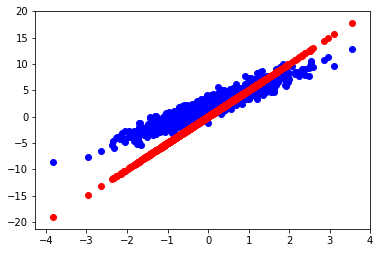

In [11]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')

print('현재 손실:')
print(loss(model(inputs), outputs).numpy())

## 4. 훈련 정의
`경사 하강법(gradient descent)`을 사용해 `W`와 `b`를 업데이트하여 훈련하겠습니다. 

In [12]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

훈련 데이터를 반복적으로 실행하고 `W`와 `b`의 변화 과정을 확인합니다.

에포크  0: W=5.00 b=0.00, 손실=8.59155
에포크  1: W=4.62 b=0.39, 손실=5.93443
에포크  2: W=4.32 b=0.71, 손실=4.20203
에포크  3: W=4.07 b=0.96, 손실=3.07239
에포크  4: W=3.87 b=1.16, 손실=2.33571
에포크  5: W=3.71 b=1.32, 손실=1.85523
에포크  6: W=3.58 b=1.45, 손실=1.54182
에포크  7: W=3.47 b=1.56, 손실=1.33736
에포크  8: W=3.38 b=1.64, 손실=1.20396
에포크  9: W=3.31 b=1.71, 손실=1.11691


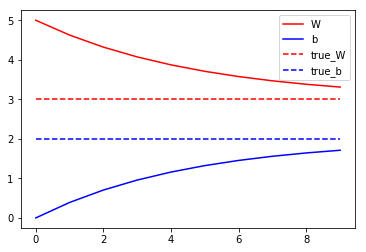

In [14]:
model = Model()

# 도식화를 위해 W값과 b값의 변화를 저장합니다.
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('에포크 %2d: W=%1.2f b=%1.2f, 손실=%2.5f' %
         (epoch, Ws[-1], bs[-1], current_loss))

# 저장된 값들을 도식화합니다.
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
        [TRUE_B] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true_W', 'true_b'])
plt.show()